In [1]:
import numpy as np
import pandas as pd
import scipy.stats 
import matplotlib.pyplot as plt

In [2]:
#load data
music_tb=pd.read_csv("myMusic.csv")#.drop("index",axis=1)
music_tb
print('We have {} NaN/NULL values in music_tb'.format(music_tb.isnull().values.sum()))
# print('We have {} NaN/NULL values in test '.format(xtest.isnull().values.sum()))

We have 0 NaN/NULL values in music_tb


In [3]:
one_to_ten_minutes = (music_tb["duration_ms"] >= 60000) & (
    music_tb["duration_ms"] <= 10 * 60000
)
music_tb = music_tb.loc[one_to_ten_minutes.values]
music_tb["duration_ms"].describe()

count      1917.000000
mean     233298.828378
std       84404.190857
min       60867.000000
25%      175000.000000
50%      218787.000000
75%      271933.000000
max      598867.000000
Name: duration_ms, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = music_tb.drop(['artists_id', 'energy'], axis = 1)
# x = music_tb['valence', 'duration_ms']
x_scale = sc.fit_transform(x)
x = pd.DataFrame(x_scale, columns = x.columns)
y = music_tb['artists_id']
# y1 = []
# for i in range(0, len(y)) :
#     y1.append(map(int, y[i]))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1024)


sc.fit(x_train)
xtest = sc.transform(x_test)
xtrain = sc.transform(x_train)

x

,danceability,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,duration_ms
0,-1.240498,-0.753608,1.685081,-0.071700,1.121831,-0.436226,-0.129738,-0.411828,-0.693438
1,0.882290,1.585774,-0.693585,0.491367,0.083172,-0.413173,-0.151224,-0.369247,-0.640797
2,1.971697,-0.772783,-1.509940,1.107056,-1.094820,-0.436226,0.960648,1.269490,0.103270
3,-0.754934,-1.581979,-0.558825,-1.065061,1.026128,3.104312,-0.312365,-0.456990,2.261546
4,-0.848312,0.243506,0.034845,-2.125820,1.234423,-0.411859,0.085116,-0.356344,0.375212
...,...,...,...,...,...,...,...,...,...
1912,-0.045263,1.209939,-0.687541,1.008085,-0.218011,-0.436199,-0.750130,-0.146018,0.665640
1913,-0.736258,-1.574309,1.795427,1.228899,0.344948,-0.436201,-0.597047,-0.293117,-0.388457
1914,0.764011,1.493733,-0.457460,0.755494,-1.125727,-0.436073,-0.754965,0.856580,-0.856802
1915,-0.431224,-0.676907,1.007638,-1.128006,0.029690,-0.435958,-0.823181,-0.238922,2.045387


In [5]:
from sklearn.metrics import confusion_matrix,accuracy_score
def evaluation(actuall,predict):
    cm=confusion_matrix(actuall, predict)
    FN = cm.sum(axis = 1) - np.diag(cm)
    FP = cm.sum(axis = 0) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - FN - FP - TP
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (FN + FP + TP + TN)
    print(cm)
    accu = pd.DataFrame(accuracy).T
#     accu.columns=["class1","class2","class3","class4"]
    sen = pd.DataFrame(sensitivity).T
#     sen.columns=["class1","class2","class3","class4"]
    spe = pd.DataFrame(specificity).T
#     spe.columns=["class1","class2","class3","class4"]
    combine = pd.concat([sen, spe], axis=0)
    combine = pd.concat([combine,accu], axis=0).reset_index(drop=True)
    print("\nOverall Accuracy", accuracy_score(actuall, predict))
    print(pd.concat([pd.DataFrame(["Sensitivity", "Specificity", "Accuracy"], columns = ["matrix"]), combine], axis = 1),"\n\n\n")

In [6]:
from sklearn.naive_bayes import GaussianNB
#priors=[0.33,0.25,0.23,0.19]
GB=GaussianNB()
GB.fit(xtrain.astype(float), y_train.astype(float))
GB_train_p = GB.predict(xtrain)
GB_test_p = GB.predict(xtest)

# evaluation(y_train, GB_train_p)

# evaluation(y_test, GB_test_p)

In [7]:
#fuction to plot the ROC curve
from sklearn.metrics import roc_curve,auc
def roc_plot(y_true,y_p,title):
    fpr, tpr, thresholds = roc_curve(y_true,y_p, pos_label=0)
    auc_=round(auc(fpr, tpr),3)
    plt.plot(fpr, tpr,label= 'Area under the curve is{}'.format(auc_))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    d=tpr-fpr
#     print('best cut off threshold maximize both the sensitivity and specificity: ',round(thresholds[d.tolist().index(max(d))],3),
#           '\nThe maximizes value for sensitivity + specificity - 1 =',np.round(max(d),3))

c:\users\dell\miniconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


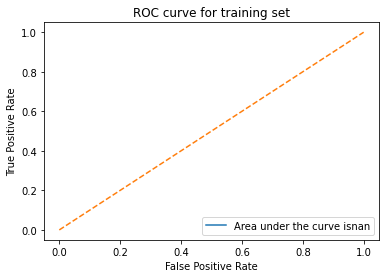

In [8]:
roc_plot(y_train, GB_train_p, title="ROC curve for training set")

c:\users\dell\miniconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


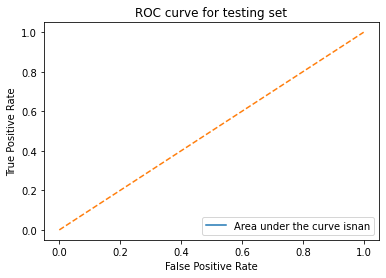

In [10]:
roc_plot(y_test,GB_test_p,title="ROC curve for testing set")

In [11]:
#create a fuction to make lift plot, gain plot and the table
def lif_tb_plot(y_p):
    lift_tb=y_p[['positive class probability(class0)','actual class, target=0 others=1']]
    lift_tb=lift_tb.sort_values(by=['positive class probability(class0)'],ascending=False).reset_index(drop=True)
    
    count=[]
    for i in range(10,101,10):
        count.append(int(len(lift_tb)*(i/100)))
    
    target=[]
    total_target=len(lift_tb.loc[lift_tb['actual class, target=0 others=1']==0])
    for i in count:
        target.append((len(lift_tb.loc[:i].loc[lift_tb['actual class, target=0 others=1']==0])/total_target)*100)

    cimul_count=np.array([i for i in range(10,101,10)])
    percent=pd.DataFrame(cimul_count,columns=["size count%"])
    tb=pd.DataFrame(np.round(np.array(target),2),columns=["cumulative target gain % "])

    lift=[]
    for i in range(len(target)):
        lift.append(np.round(target[i]/cimul_count[i],3))
    final=pd.concat([percent,tb],axis=1)
    lift_tb1=pd.concat([final,pd.DataFrame(lift,columns=["lift"])],axis=1)
    
    return lift_tb1, plt.plot(lift_tb1[["size count%"]],lift_tb1[["lift"]]),plt.title("lift chart"),plt.xlabel('size count%'),plt.ylabel('lift'),plt.xlim(10,100),plt.ylim(0.8,1.5),plt.plot([10, 100],[1, 1],linestyle='--'),plt.show(),plt.plot(lift_tb1[["size count%"]],lift_tb1[["cumulative target gain % "]]),plt.title("gain chart"),plt.xlabel('size count%'),plt.ylabel('cumulative target gain %'),plt.xlim(10,100),plt.plot([10, 100],[10, 100],linestyle='--'),plt.show()



# #############

In [12]:
# load data
tb = music_tb#pd.read_csv("myMusic.csv")
tb.columns.values
# tb.drop("Unnamed: 0",axis=1,inplace=True)

array(['artists_id', 'danceability', 'energy', 'valence', 'tempo',
       'loudness', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness', 'duration_ms'], dtype=object)

In [13]:
x = music_tb.drop('artists_id', axis = 1)
x_scale = sc.fit_transform(x)
x = pd.DataFrame(x_scale, columns = x.columns)
y = music_tb['artists_id']

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

tr_train_accuracy = []
nb_train_accuracy = []
tr_test_accuracy = []
nb_test_accuracy = []
for i in range(150):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.34)
#     dt=DecisionTreeClassifier(max_depth=100,min_samples_split=30,min_samples_leaf=15)
#     dt.fit(xtrain,ytrain)
#     ptrain_dt=dt.predict(xtrain)
#     ptest_dt=dt.predict(xtest)
#     tr_train_accuracy.append(np.round(accuracy_score(ytrain,ptrain_dt),3))
#     tr_test_accuracy.append(np.round(accuracy_score(ytest,ptest_dt),3))
    
    #normalize the data because gausian naive bayes assume features to be normal distributed
    scaler = StandardScaler()
    scaler.fit(xtrain)
    xtest = scaler.transform(xtest)
    xtrain = scaler.transform(xtrain)
    nb = GaussianNB()
    nb.fit(xtrain, ytrain)
    ptrain_nb = nb.predict(xtrain)
    ptest_nb = nb.predict(xtest)
    
    nb_train_accuracy.append(np.round(accuracy_score(ytrain, ptrain_nb), 3))
    nb_test_accuracy.append(np.round(accuracy_score(ytest, ptest_nb), 3))

In [14]:
def range_calculate_90(lst):
    n = 150
    m = np.round(np.array(lst).mean(), 3)
    v = np.round(m * (1 - m) / n, 3)
    std = np.sqrt(v)
    upper_bond = np.round(m + std * 1.65, 3)
    lower_bound = np.round(m - std * 1.65, 3)
    return ["mean accuracy={}".format(m),"variance={}".format(v), "90% CI upper bound={}".format(upper_bond), "90% CI lower bound={}".format(lower_bound)]


In [15]:
# print("The decision tree model on training set:","\n",range_calculate_90(tr_train_accuracy))
# print("\nThe decision tree model on testing set:","\n",range_calculate_90(tr_test_accuracy))
print("\nThe naive bayes on training set:","\n", range_calculate_90(nb_train_accuracy))
print("\nThe naive bayes on testing set:","\n", range_calculate_90(nb_test_accuracy))


The naive bayes on training set: 
 ['mean accuracy=0.853', 'variance=0.001', '90% CI upper bound=0.905', '90% CI lower bound=0.801']

The naive bayes on testing set: 
 ['mean accuracy=0.029', 'variance=0.0', '90% CI upper bound=0.029', '90% CI lower bound=0.029']
